In [1]:
%load_ext autoreload
%autoreload
%autoreload 2

In [1]:
from flux_gen_redux import FluxGenerator, FluxDatasetGenerator
from synthetic_torch_helpers import SyntheticFluxDataset, H5Dataset, SynH5Dataset
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os

import datetime

In [2]:
eigen_spectra = fits.open('spMLpcaGal-55331-7temp.fits')
e_templates = eigen_spectra[0].data

In [3]:
manga_wave = np.load('manga_wave.npy')

# Single Flux Generation Example

In [4]:
fg = FluxGenerator(e_templates, np.array(manga_wave), .001, a=1, noise=0, continuum=False)

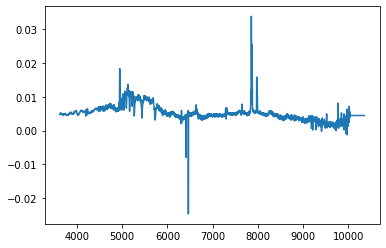

In [5]:
plt.plot(manga_wave, fg.generate())

# Flux Dataset Generationg Example

In [6]:
num_spectra = 20 
zs = np.arange(0.0, .14, .01) 
rs = [1]
noises = [0] 
continuums = [False]
filename = "./generated_sets/syn_flux_dataset_ez3asdfasdfasfasdfasdfsdfasdf.h5"

In [7]:
fdg = FluxDatasetGenerator(filename=filename, templates=e_templates, manga_wave=manga_wave, 
                           num_spectra=num_spectra, 
                           zs=zs,
                           rs=rs,
                           noises=noises,
                           continuums=continuums,
                           track_params=True, 
                           description= {
                               'desc': 'An easy dataset to see if the simple model can achieve a score within the scientific standard.',
                               'num_spectra': num_spectra,
                               'zs': zs,
                               'rs': rs,
                               'noise': noises,
                               'continuums': continuums
                               
                           })

In [8]:
fdg.generate_dataset()

### Checking out generated dataset

In [9]:
temp = h5.File(filename, 'r')

In [10]:
for k, v in temp.attrs.items():
    print(k, v)

continuums [False]
desc An easy dataset to see if the simple model can achieve a score within the scientific standard.
manga_wave [ 3621.6   3622.43  3623.26 ... 10349.   10351.4  10353.8 ]
noise [0]
num_spectra 20
rs [1]
zs [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14]


In [5]:
temp['zs'][:]

array([[0.01],
       [0.12],
       [0.06],
       ...,
       [0.04],
       [0.03],
       [0.13]], dtype=float32)

(array([1289.,  668., 1392.,  663.,  621., 1390.,  600., 1379.,  679.,
        1319.]),
 array([0.   , 0.014, 0.028, 0.042, 0.056, 0.07 , 0.084, 0.098, 0.112,
        0.126, 0.14 ], dtype=float32),
 <a list of 10 Patch objects>)

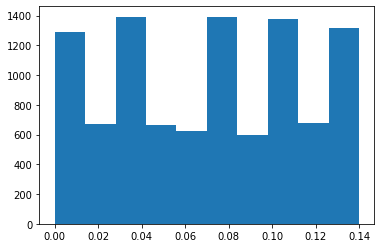

In [6]:
plt.hist(temp['zs'][:])

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <a list of 10 Patch objects>)

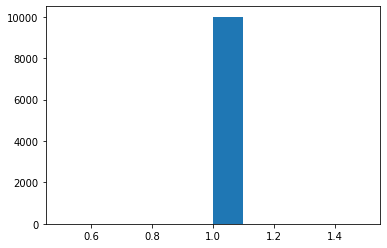

In [7]:
plt.hist(temp['as'][:])

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <a list of 10 Patch objects>)

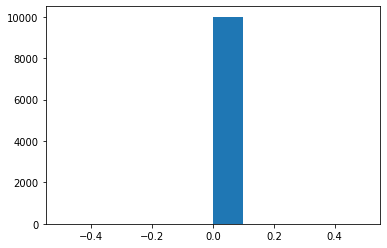

In [8]:
plt.hist(temp['noises'][:])

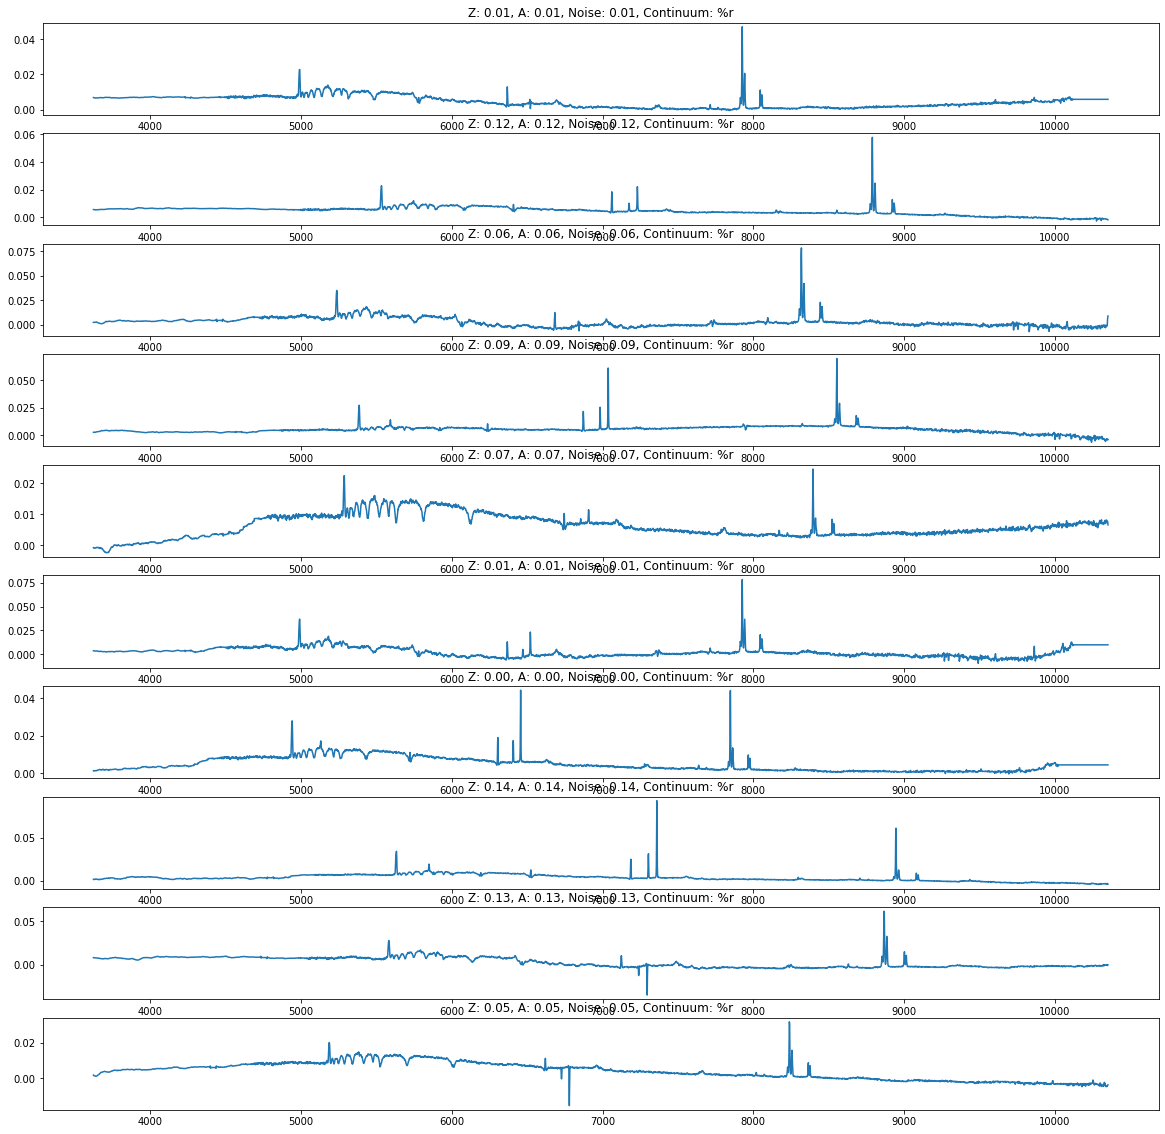

In [11]:
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(20,20))
for ax, f, z, n, a, c in zip(axs, temp['flux'], temp['zs'], temp['noises'], temp['as'], temp['continuums']):
    ax.plot(manga_wave, f[0])
    ax.set_title("Z: {0:.2f}, A: {0:.2f}, Noise: {0:.2f}, Continuum: %r".format(z[0], a, n, c))